### Data extraction

In [15]:
from src.data import Data

tar_folder_path = r"Rohdaten\UKDCEUS034"

data_obj = Data(
    tar_folder_path = tar_folder_path,
    
    device      = "L15",      # "L15"   , "C3"  
    size        = "large",   # "large" , "small"
    signal_type = "no_tgc",  # "tgc"   , "no_tgc"      
    
    ac_method        = "off",   # "afd_base", "fd_base", "d_base", "off"
    # v1             = 50,      # Uncomment the vertical and horizontal lines to define a region of interest.
    # v2             = 150,
    # h1             = 600,
    # h2             = 1700,
    )

### Available data

In [16]:
# main signal
data_obj.signal_3d    
  
# trimmed signal 
data_obj.trimmed_signal_3d             


array([[[-1.917e+01, -1.930e+02, -1.930e+02, ..., -1.950e+02,
         -1.950e+02, -1.940e+02],
        [ 3.547e+01, -1.930e+02,  3.570e+02, ..., -1.950e+02,
          3.570e+02, -1.940e+02],
        [ 3.547e+01,  3.800e+02,  3.570e+02, ...,  3.850e+02,
          3.570e+02,  3.880e+02],
        ...,
        [ 3.000e-02,  1.800e+01,  2.000e+01, ...,  6.000e+00,
          1.300e+01,  2.200e+01],
        [ 1.000e-02,  1.800e+01,  1.500e+01, ...,  6.000e+00,
          2.100e+01,  2.300e+01],
        [ 1.000e-02, -4.000e+00,  1.500e+01, ...,  5.000e+00,
          2.100e+01,  3.000e+01]],

       [[ 3.130e+02,  3.130e+02,  3.170e+02, ...,  3.110e+02,
          3.120e+02,  3.110e+02],
        [ 3.130e+02,  4.240e+02,  3.170e+02, ...,  4.200e+02,
          3.120e+02,  3.110e+02],
        [ 1.630e+02,  4.240e+02,  1.630e+02, ...,  4.200e+02,
          1.740e+02,  1.750e+02],
        ...,
        [ 2.000e+01, -9.000e+00,  1.000e+01, ...,  2.000e+00,
         -1.800e+01,  1.600e+01],
        [ 1.

data shape =  (192, 2736, 11)


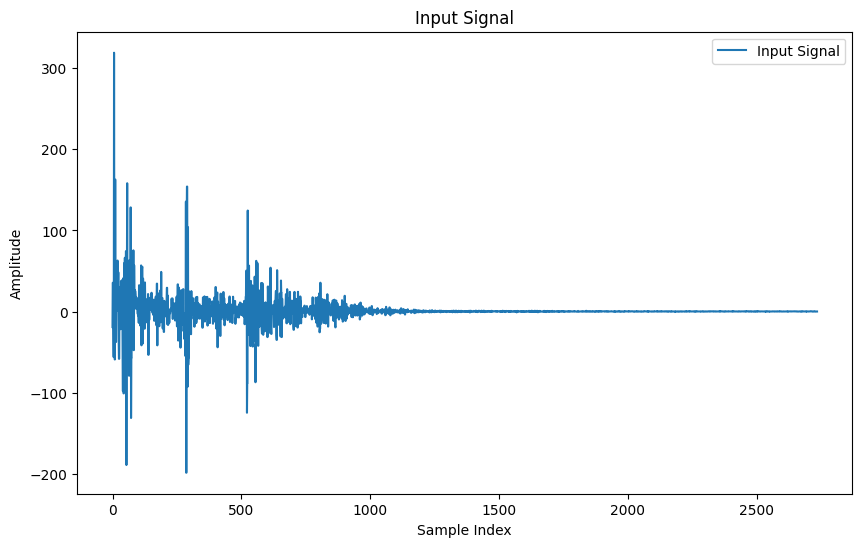

In [17]:
import matplotlib.pyplot as plt

print("data shape = ", data_obj.signal_3d.shape)

frame = 0
x = 0

# Generate a sample input signal
signal = data_obj.signal_3d[x, :, frame]         

# Plot the input signal
plt.figure(figsize=(10, 6))
plt.plot(signal, label='Input Signal')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Input Signal')
plt.legend()

# Show plot
plt.show()


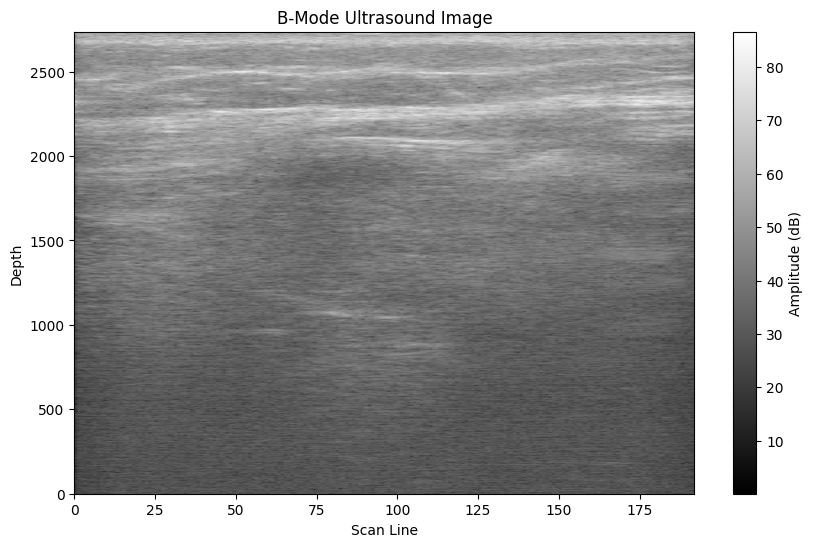

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Assuming data_obj.signal_2d is your 2D signal array
data_2d = data_obj.signal_2d

# Compute the analytic signal using the Hilbert transform to get the envelope
analytic_signal = hilbert(data_2d, axis=0)
amplitude_envelope = np.abs(analytic_signal)

# Apply logarithmic transformation for better visualization
amplitude_envelope = 20 * np.log10(1 + amplitude_envelope)

# Rotate the envelope 90 degrees counterclockwise and flip it vertically
amplitude_envelope = np.rot90(amplitude_envelope)
amplitude_envelope = np.flipud(amplitude_envelope)

# Plot the B-mode image
plt.figure(figsize=(10, 6))
plt.imshow(amplitude_envelope, cmap='gray', aspect='auto', extent=[0, amplitude_envelope.shape[1], 0, amplitude_envelope.shape[0]])
plt.colorbar(label='Amplitude (dB)')
plt.xlabel('Scan Line')
plt.ylabel('Depth')
plt.title('B-Mode Ultrasound Image')
plt.show()
